In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Function(x):
    return np.sqrt(np.tan(x))

In [4]:
def ProgressiveDerivative(f,x,h):
    
    d = 0.
    
    if h != 0:
        d = (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
        
    return d

In [5]:
ProgressiveDerivative(Function,0.5,0.01)

0.8782503453115209

In [6]:
def CentralDerivative(f,x,h):
    d = 0.
    
    if h != 0:
        d = (f(x+h) - f(x-h))/(2*h)
        
    return d

In [7]:
CentralDerivative(Function,0.5,0.01)

0.8784304002217802

In [8]:
def theorical_Derivative(x):
    return ((1/np.cos(x))**2)/(2*(np.tan(x)**(1/2)))

In [9]:
x = np.linspace(0,np.pi/3,50)
PD = ProgressiveDerivative(Function,x,0.01)
CD = CentralDerivative(Function,x,0.01)
TD = theorical_Derivative(x)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_46088\3419915206.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.tan(x))
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_46088\17087125.py:2: RuntimeWarning: divide by zero encountered in divide
  return ((1/np.cos(x))**2)/(2*(np.tan(x)**(1/2)))


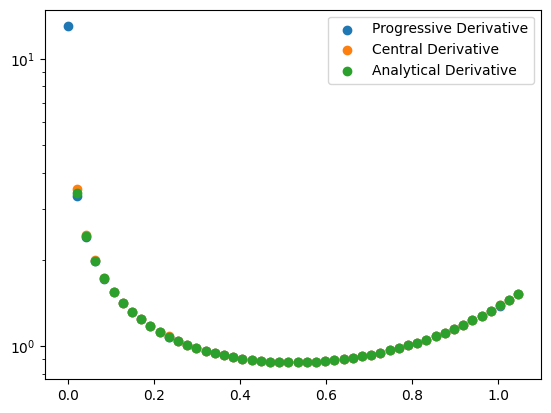

In [10]:
plt.scatter(x,PD,label='Progressive Derivative')
plt.scatter(x,CD,label='Central Derivative')
plt.scatter(x,TD,label='Analytical Derivative')
plt.yscale('log')
plt.legend()

In [11]:
def Error(d_real,d_teorica):
    errores = np.zeros(len(d_real))
    for i in range(len(d_real)):
        e = np.abs(d_teorica[i]-d_real[i])
        errores[i] = e
    return errores

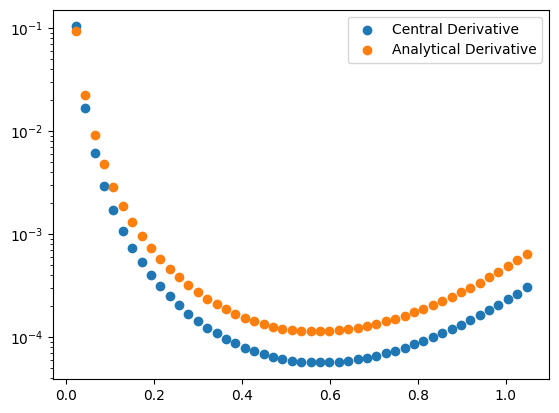

In [12]:
E_Central = Error(TD,CD)
E_Progressive = Error(TD,PD)

plt.scatter(x,E_Central,label='Central Derivative')
plt.scatter(x,E_Progressive,label='Analytical Derivative')
plt.yscale('log')
plt.legend()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


x=sym.Symbol("x",real=True)
h=sym.Symbol("h",real=True)
x0,x1,x2,=sym.symbols("x0,x1,x2",real=True)
f0,f1,f2,=sym.symbols("f0,f1,f2",real=True)

X=[x0,x1,x2]
Y=[f0,f1,f2]

def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

f=Interpolate(x,X,Y)

Derivada_prog=sym.diff(f,x,1)

Derivada_prog=Derivada_prog.subs(x,x0)
Derivada_prog=Derivada_prog.subs([(x1,x0+h),(x2,x0+2*h)])

print("Los coeficientes son:", Derivada_prog)

def derivada_prog(f,x,h):
    
 return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

def function(x):
    
    return np.sqrt(np.tan(x))
def derivada_Central(f,x,h):
    d=0.
    if h!=0:
        d=(f(x+h)-f(x-h))/(2*h)
    return d



x=np.linspace(0.1,1.1,100)
h=0.01
y=function(x)

dx=derivada_prog(function, x, h)

edx=(np.cos(x)**(-2))/(2*np.sqrt(np.tan(x)))
cdx=derivada_Central(function,x,h)


fig1=plt.figure()

ax1=fig1.add_subplot(231)

ax1.scatter(x,edx,c="b",label="Derivada Analitica")

ax1.legend()

ax2=fig1.add_subplot(233)

ax2.scatter(x,dx,c="r",label="Derivada Progresiva")

ax2.legend()

ax3=fig1.add_subplot(232)

ax3.scatter(x,cdx,c="k",label="Derivada Central")

ax3.legend()
"""
fig2=plt.figure()
"""
ax4=fig1.add_subplot(212)

ax4.scatter(x,cdx-edx,c="b",label="Error Derivada central")



ax4.scatter(x,dx-edx,c="r",label="Error Derivada Progresiva")

ax4.legend()

ModuleNotFoundError: No module named 'sympy'